In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("C:/Users/a/Downloads/source/11장/chap11_전복나이예측.csv")

In [188]:
df.head()

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.407,2.0
1,0.275,0.095,0.2170,0.0435,0.090,1.0
2,0.470,0.165,0.9975,0.2420,0.330,0.0
3,0.450,0.140,1.0130,0.2160,0.360,0.0
4,0.380,0.135,0.6810,0.1420,0.170,0.0


In [189]:
df.isnull().sum()

Diameter         0
Height           0
Whole_Weight     0
Viscra_Weight    0
Shell_Weight     0
Group            0
dtype: int64

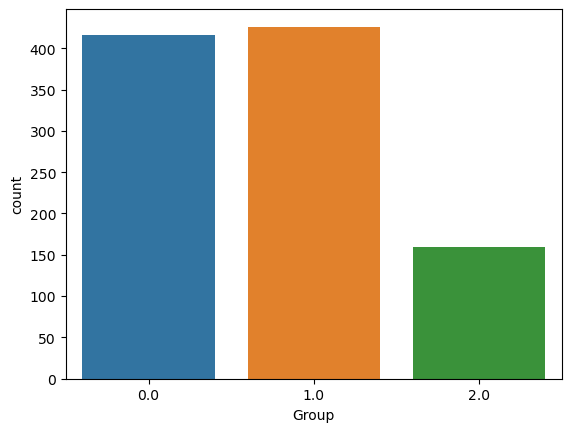

In [190]:
sns.countplot(data=df,x='Group')
plt.show()

In [191]:
data = df.loc[:,['Diameter','Height','Group']]
data.loc[data['Group']==0.0,['Group']]='Year0'
data.loc[data['Group']==1.0,['Group']]='Year1'
data.loc[data['Group']==2.0,['Group']]='Year2'

In [192]:
diameter = data.groupby(['Group','Diameter'])['Diameter'].count()
Height = data.groupby(['Group','Height'])['Height'].count()
diameter = diameter.to_frame(name='count')
Height = Height.to_frame(name='count')
diameter = diameter.reset_index()
Height = Height.reset_index()

In [193]:
data

,Diameter,Height,Group
0,0.525,0.195,Year2
1,0.275,0.095,Year1
2,0.470,0.165,Year0
3,0.450,0.140,Year0
4,0.380,0.135,Year0
...,...,...,...
997,0.450,0.160,Year0
998,0.260,0.100,Year1
999,0.505,0.175,Year0
1000,0.300,0.105,Year1


In [194]:
Group0 = data.loc[data.Group=='Year0',['Group','Height','Diameter']]
Group1 = data.loc[data.Group=='Year1',['Group','Height','Diameter']]
Group2 = data.loc[data.Group=='Year2',['Group','Height','Diameter']]

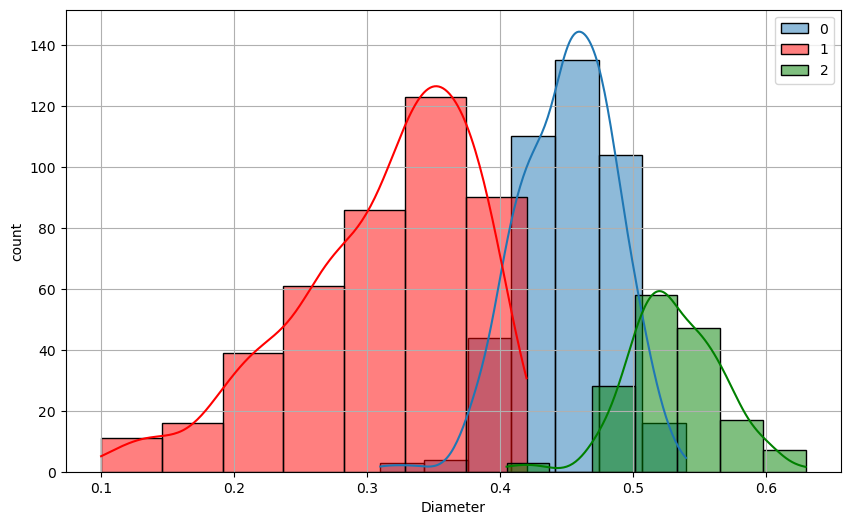

In [195]:
plt.figure(figsize=(10,6))
sns.histplot(Group0['Diameter'],bins=7,alpha=0.5,label='0',kde=True)
sns.histplot(Group1['Diameter'],bins=7,alpha=0.5,label='1',color='r',kde=True)
sns.histplot(Group2['Diameter'],bins=7,alpha=0.5,label='2',color='g',kde=True)

plt.xlabel('Diameter')
plt.ylabel('count')
plt.legend()
plt.grid()
plt.show()

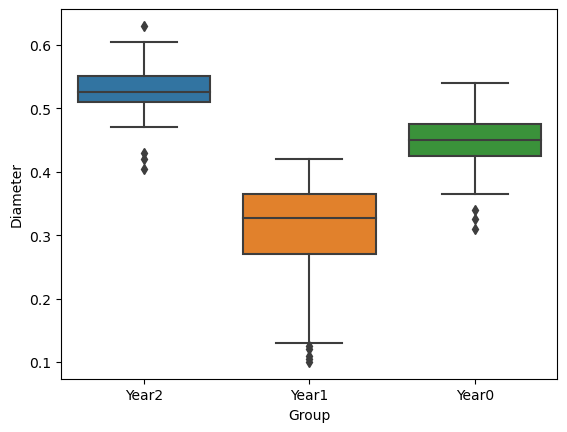

In [196]:
sns.boxplot(x='Group',y='Diameter',data=data)
plt.show()

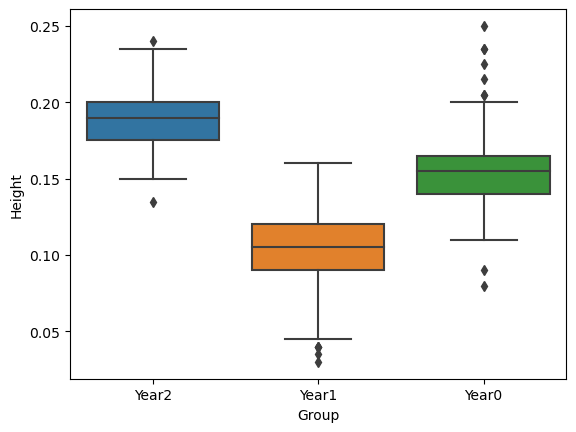

In [197]:
sns.boxplot(x='Group',y='Height',data=data)
plt.show()

<AxesSubplot:xlabel='Group', ylabel='Diameter'>

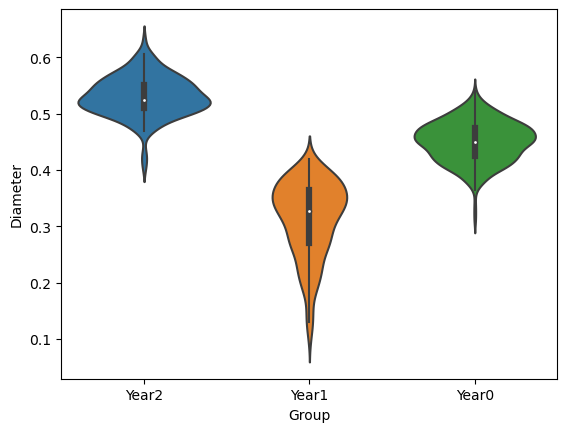

In [198]:
sns.violinplot(x='Group',y='Diameter',data=data)

<AxesSubplot:xlabel='Group', ylabel='Height'>

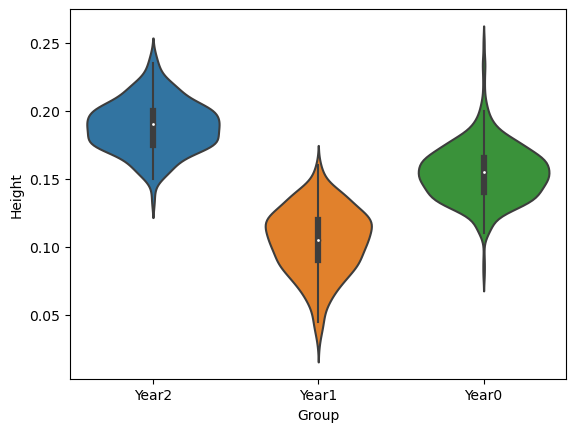

In [199]:
sns.violinplot(x='Group',y='Height',data=data)

In [200]:
data5 = df.drop('Group',axis=1)
data5.head()

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight
0,0.525,0.195,1.3700,0.2955,0.407
1,0.275,0.095,0.2170,0.0435,0.090
2,0.470,0.165,0.9975,0.2420,0.330
3,0.450,0.140,1.0130,0.2160,0.360
4,0.380,0.135,0.6810,0.1420,0.170


<AxesSubplot:>

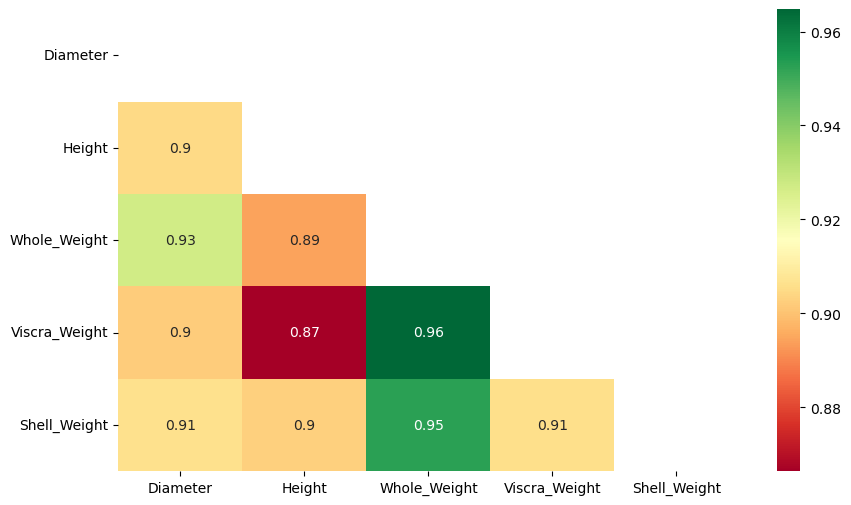

In [201]:
plt.figure(figsize=(10,6))
corr = data5.corr()
mat = np.triu(corr)
sns.heatmap(corr, annot=True,cmap='RdYlGn',mask=mat)

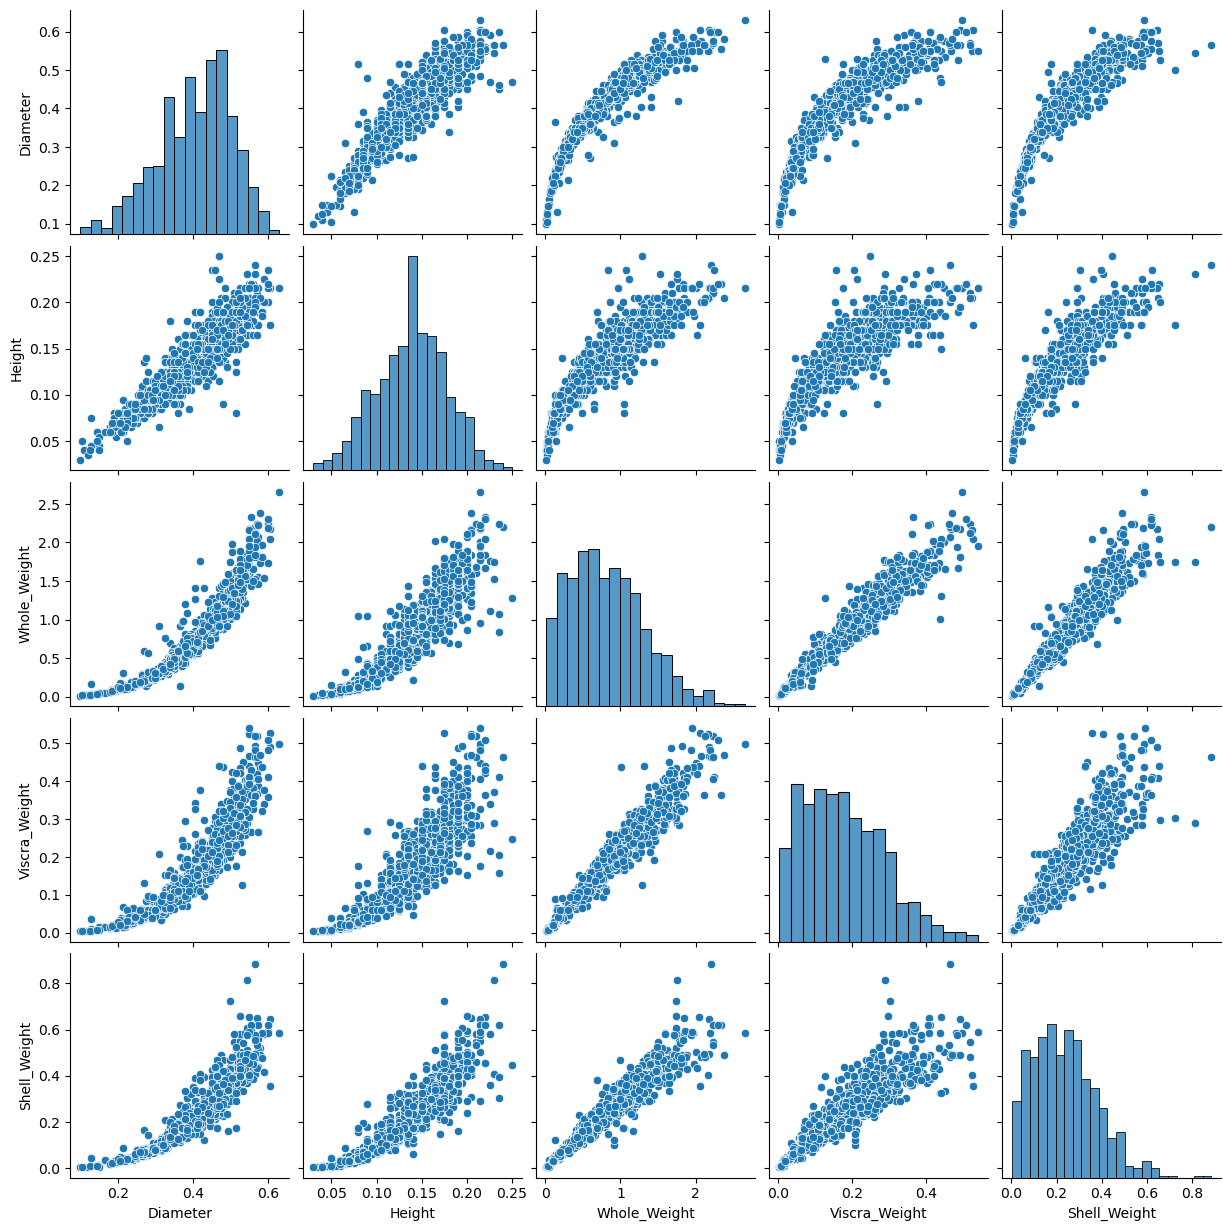

In [202]:
sns.pairplot(data5)

In [203]:
df['Diameter'].mean()

0.40496007984031923

In [204]:
data.loc[data['Diameter']<0.4, 'diameter'] = 'small'
data.loc[data['Diameter']>=0.4, 'diameter'] = 'big'
dm = data.groupby(['Group','diameter'])['diameter'].count()
dm = dm.to_frame(name='count')
dm = dm.reset_index()

In [205]:
dm

,Group,diameter,count
0,Year0,big,392
1,Year0,small,24
2,Year1,big,26
3,Year1,small,400
4,Year2,big,160


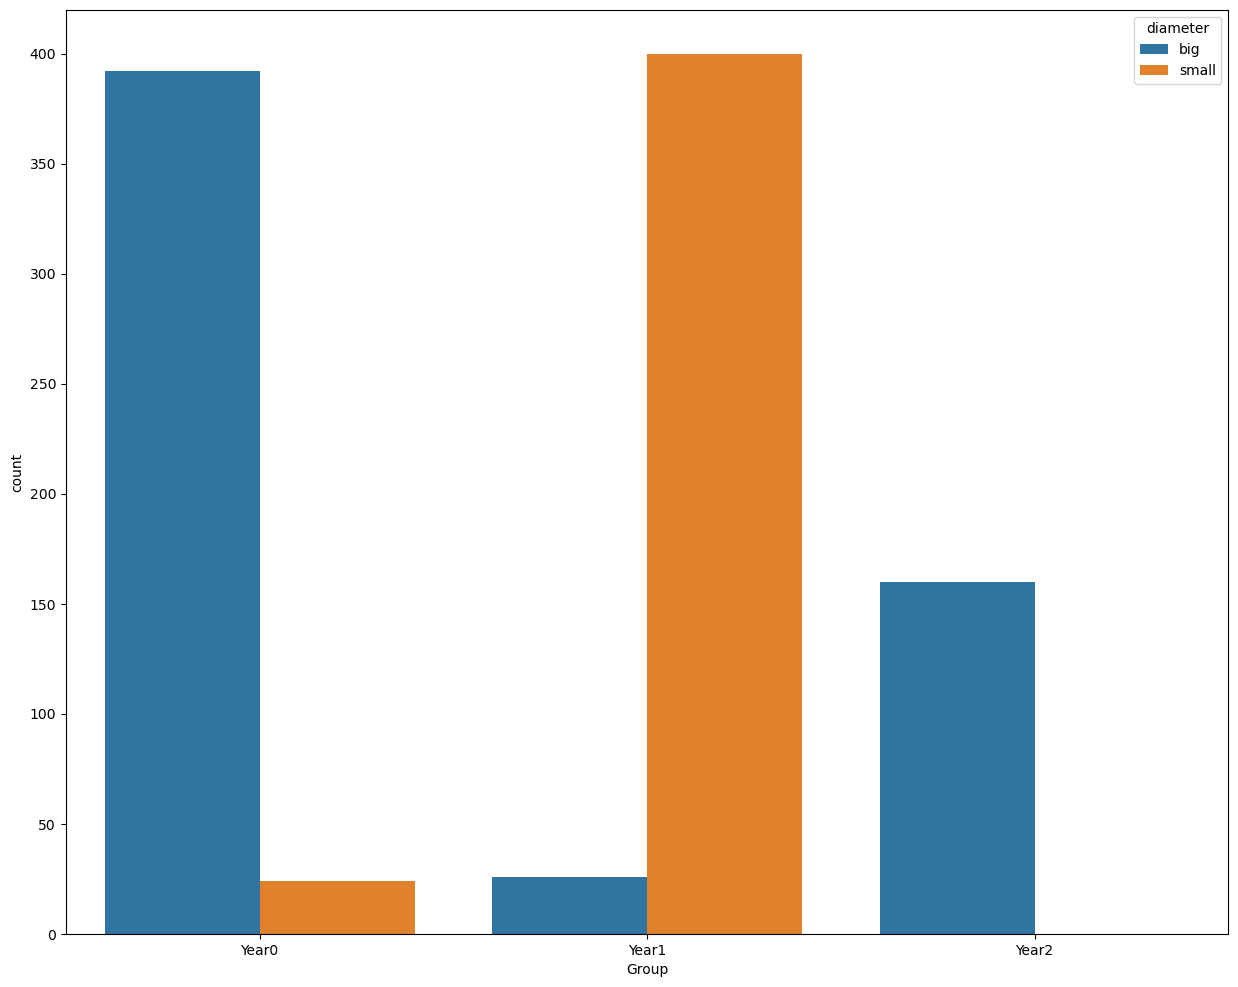

In [208]:
fig = plt.figure(figsize=(15,12))
sns.barplot(x='Group',y='count',hue='diameter',data=dm)
plt.show()